                                                    AI - Project 1

First we implement the Graph Generation 

We start with the generation of de n vertex of the graph.

In [1]:
import random
import math
graphX = []
graphY = []

#Enter value of n from 10 - 100 in multiples of 10
n = 10

for i in range(n):
    x = random.random()
    y = random.random()
    graphX.append(x)
    graphY.append(y)
print("X coordinates are - " + str(graphX))
print("Y coordinates are - " + str(graphY))

graph = {}
listX = []
listY = []
for i in range(0,10):  
    graph[i] = [random.choice(graphX),random.choice(graphY)]
    listX.append((graph[i])[0])
    listY.append((graph[i])[1])
    
print "\nDICTIONNARY OF VERTEX GENERATED"
graph

X coordinates are - [0.7374399611590129, 0.7425914160325254, 0.23372942905587601, 0.2565515780298755, 0.335721952699628, 0.9108887558088778, 0.8260076840820293, 0.778723318078044, 0.13173226254527315, 0.0362479430528877]
Y coordinates are - [0.42827294991972453, 0.34949932385342797, 0.9162138824850825, 0.27247673445407716, 0.19512008177848872, 0.5898489978004595, 0.3477784698941033, 0.8807439507742436, 0.21532025979832348, 0.5794416592500883]

DICTIONNARY OF VERTEX GENERATED


{0: [0.8260076840820293, 0.8807439507742436],
 1: [0.7425914160325254, 0.21532025979832348],
 2: [0.778723318078044, 0.21532025979832348],
 3: [0.335721952699628, 0.19512008177848872],
 4: [0.7374399611590129, 0.27247673445407716],
 5: [0.7425914160325254, 0.8807439507742436],
 6: [0.0362479430528877, 0.5898489978004595],
 7: [0.13173226254527315, 0.5898489978004595],
 8: [0.0362479430528877, 0.5898489978004595],
 9: [0.2565515780298755, 0.5794416592500883]}

Display the vertex on the screen

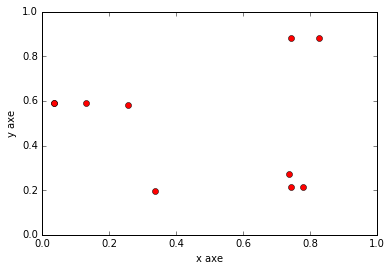

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(listX, listY, 'ro')
plt.axis([0, 1, 0, 1])
plt.xlabel('x axe')
plt.ylabel('y axe')
plt.show()

Then we will compute the Euclidian distance between all the point and sort it in a dictionnary

In [3]:
from collections import OrderedDict
from operator import itemgetter

distanceList = []
for key1, value  in graph.items() :
    vertex ={}
    x1Coordinate = value[0]
    y1Coordinate = value[1]
    x1 = x1Coordinate
    y1 = y1Coordinate
    for key, value in graph.items():
        x2Coordinate = value[0]
        y2Coordinate = value[1]
        x = (x2Coordinate - x1Coordinate)**2
        y = (y2Coordinate - y1Coordinate)**2
        vertex[key] = math.sqrt(x+y)
    del vertex[key1]
    distanceList.append(OrderedDict(sorted(vertex.items(), key=itemgetter(1))))
distanceList

[OrderedDict([(5, 0.08341626804950386),
              (4, 0.6146814199190117),
              (9, 0.6442540862096172),
              (2, 0.6671015663153668),
              (1, 0.6706317635538325),
              (7, 0.7527537675864934),
              (6, 0.8416295635349538),
              (8, 0.8416295635349538),
              (3, 0.8428880045023088)]),
 OrderedDict([(2, 0.03613190204551853),
              (4, 0.05738815280515352),
              (3, 0.4073706020134896),
              (9, 0.6073047979922057),
              (5, 0.6654236909759201),
              (0, 0.6706317635538325),
              (7, 0.7165337961245339),
              (6, 0.7994953892364914),
              (8, 0.7994953892364914)]),
 OrderedDict([(1, 0.03613190204551853),
              (4, 0.07050658234220351),
              (3, 0.44346167469035447),
              (9, 0.6365907002491034),
              (5, 0.6664039337049593),
              (0, 0.6671015663153668),
              (7, 0.7475755490442966),
              (

Edges

Want to plot an edge bitween 2 vertex :  

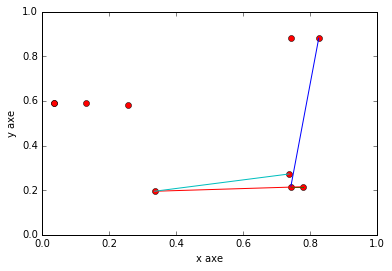

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt


plt.plot(listX, listY, 'ro')
plt.axis([0, 1, 0, 1])
plt.xlabel('x axe')
plt.ylabel('y axe')
plt.plot([listX[0], listX[1]], [listY[0], listY[1]])
plt.plot([listX[1], listX[2]], [listY[1], listY[2]])
plt.plot([listX[2], listX[3]], [listY[2], listY[3]])
plt.plot([listX[3], listX[4]], [listY[3], listY[4]])
plt.show()

test : 
if there is already an edge
intersection
vertical
overlap
parallele


In [ ]:
import random
import math
from collections import defaultdict
from sortedcontainers import SortedDict
import matplotlib.pyplot as py

graph = defaultdict(list)
# Represents an undirected graph.  Key is node ID, value is a list of           
# node IDs that share an edge.
# {nodeID: [nodeIDs...]}


color = {}
# Maps node ID to some color value
# {nodeID: 'color'}


coords = {}
# Maps node ID to a tuple representing Cartesian coordinates
# {nodeID: (x, y)}


distance = defaultdict(list)
# Maps node ID to a list of tuples which represent NodeID and distance 
# {nodeID: [(nodeID, distance)...]}  

conflicts = list()
#List of the number of conflic for each vertex 


def generate_points(n):
    ''' Generates n sets of points randomly scattered on the 
    unit square and stores them as tuples mapped to integer IDs
    '''
    for i in range(n):
        randX = random.randint(1, 10000)
        randY = random.randint(1, 10000)
        v = (float(randX), float(randY))
        coords[i] = v 
        

def calculate_distances():
    ''' Calculates distances between each pair of points,
    storing as a dictionary of lists of tuples, then sorting
    the lists by distance
    '''
    for i in range(len(coords)):
        for j in range(i + 1, len(coords)):
            # Calculate distance from i to j, 
            # store in both distances[i] and distances[j]
            delta_x = coords[i][0] - coords[j][0]
            delta_y = coords[i][1] - coords[j][1]
            d = math.sqrt(pow(delta_x, 2) + pow(delta_y, 2))
            distance[i].append((j, d))
            distance[j].append((i, d)) 
            
    # Sort each list of tuples by distance
    for k, v in distance.items():
        v.sort(key=lambda d: d[1])
        
        
def build_graph():
    ''' Add edges to graph by selecting a random point and adding 
    an edge to the nearest point that doesn't already have an edge
    and such that it will not cross any other edge'''
    lines = []
    # List of existing line segments (edges on graph)
    # [(A, B, C, x1, y1, x2, y2) ...]
    
    available_nodes = list(coords.keys())
    # List of node IDs to check for possible edges
    
    
    # Start main loop - run until no connections available
    while available_nodes:
        # Choose random point from available nodes
        selected_point = random.choice(available_nodes)
        # Boolean to loop until a line is added
        lineAdded = False
        while not lineAdded:
            # If there's no nodes left to check for selected node, remove from 
            # available nodes and exit loop to select a new node
            if not distance[selected_point] :
                available_nodes.remove(selected_point)
                break
            # Get closest point to our chosen point and remove it from dictionary
            # to indicate we have tried to add an edge to it.  
            else : 
                nearest_point = distance[selected_point][0][0]
                distance[selected_point].pop(0)
                
                # if no edge already exists between these points, calculate line equation
                if nearest_point not in graph[selected_point] and selected_point not in graph[nearest_point]:
                    # set coordinates for calculation
                    pt1 = coords[selected_point]
                    pt2 = coords[nearest_point]
                    x1 = pt1[0]
                    y1 = pt1[1]
                    x2 = pt2[0]
                    y2 = pt2[1]
                    
                    #Check if vertical line, might need to handle differently?
                    if x1 == x2:
                        print("Vertical line!")
                        pass
                    # Check if this line will intersect any other edges in graph
                    else:
                        # Calculate values for line Ax + By = C
                        A1 = y2 - y1
                        B1 = x1 - x2
                        C1 = A1 * x1 + B1 * y1
                        # If no edges on graph then no conflict, so add this as first edge
                        if not lines:
                            graph[selected_point].append(nearest_point)
                            lines.append((A1, B1, C1, x1, y1, x2, y2))
                            lineAdded = True
                        # Check all other edges for potential intersection
                        else:
                            intersection_found = False
                            
                            for line in lines:
                                # Retrieve pre-calculated line information
                                A2 = line[0]
                                B2 = line[1]
                                C2 = line[2]
                                x3 = line[3]
                                y3 = line[4]
                                x4 = line[5]
                                y4 = line[6]
                                
                                # Calculate determinant of system
                                det = (A1 * B2) - (A2 * B1)
                                if det == 0:
                                    # edges are parallel
                                    if abs(A1) == abs(A2) and abs(B1) == abs(B2) and abs(C1) == abs(C2):
                                        # edges fall on same line, so check for overlap
                                        if x1 == x3 or x1 == x4 and x2 == x3 or x2 == x4:
                                            # edges are exactly the same
                                            print("Same Line!")
                                            intersection_found = True
                                        elif (x1 > min(x3, x4) and x1 < max(x3, x4)
                                                or x2 > min(x3, x4) and x2 < max(x3, x4)
                                                or x3 > min(x1, x2) and x3 < max(x1, x2)
                                                or x4 > min(x1, x2) and x4 < max(x1, x2)):
                                            # Parallel edges overlap and thus intersect
                                            print("Parallel Overlap!")
                                            intersection_found = True
                                        else:
                                            # Parallel lines don't overlap so we are ok
                                            pass
                                # Calculate point of intersection
                                else:
                                    x = (B2 * C1 - B1 * C2) / det
                                    y = (A1 * C2 - A2 * C1) / det
                                    
                                    # Check if on segment 1
                                    if x > min(x1, x2) and x < max(x1, x2):
                                        if y > min(y1, y2) and y < max(y1, y2):
                                            # Check if on segment 2
                                            if x > min(x3, x4) and x < max(x3, x4):
                                                if y > min(y3, y4) and y < max(y3, y4):
                                                    # this will intersect so move on
                                                    intersection_found = True
                                                    break
                                                
                            # No intersection so add edge and line
                            if not intersection_found:
                                graph[selected_point].append(nearest_point)
                                lines.append((A1, B1, C1, x1, y1, x2, y2))
                                lineAdded = True
                                    
                                
def plot_graph():
    xval = []
    yval = []
    for i in range(len(coords)):
        xval.append(coords[i][0])
        yval.append(coords[i][1])
    py.plot(xval, yval, 'or')
    
    
    
    for pt, edges in graph.items():
        for pt2 in edges:
            xval = [coords[pt][0], coords[pt2][0]]
            yval = [coords[pt][1], coords[pt2][1]]
            py.plot(xval, yval)
    
    py.show()

    
def creat_adgacent_matrix():
    
    #init adjacent matrix
    matrix_adj = list()
    for x in range(0, len(graph)):
        raw = list()
        for y in range(0,len(graph)):
            raw.append(0)
        matrix_adj.append(raw)
    #Creat matrix
    for i in range(0,len(graph)) :
        for j in range(0, len(graph)):
            if j in graph[i] : 
                matrix_adj[i][j] = 1
                matrix_adj[j][i] = 1
    return matrix_adj
 
def random_color(nb):
    return random.randint(0, nb-1)
    
def init_graph_color(nb):
    for v in graph : 
        color[v] = random_color(nb)

def conflicts(v, mat_adj) : 
    nb = 0
    for pts in mat_adj[v]:
        if color[v] == color[pts] : 
            nb= nb + 1
    conflict[v] = nb

def test_csp(): 
    if sum(conflicts) == 0 :
        return true
    else :
        return false
def tot_conflicts(mat_adj):
    for v in graph :
        conflicts(v,mat_adj)
    return sum(conflicts)

def minimize_conflicts(mat_adj, nb):
    nb_tot_conf = tot_conflicts(mat_adj)
    list_conf = conflicts
    max_conf = conflicts.index(max(conflicts))
    col_max = color[max_conf]
    new_col = random_color(nb)
    while col_amx == new_col :
        new_col = random_color(nb)
    new_nb_tot_conf = tot_conflicts(mat_adj)
    while new_nb_tot_conf >= nb_tot_conf or max(list_conf) == 0:
        list_conf[max_conf] = 0
        max_conf = list_confs.index(max(list_conf))
        col_max = color[max_conf]
        new_col = random_color(nb)
        while col_amx == new_col :
            new_col = random_color(nb)
        new_nb_tot_conf = tot_conflict
        
    
def min_conflicts(max_it,nb) : 
    mat_adj = matric_creation()
    init_graph_color(nb)
    for i in range(1, max_it) :
        minimize_conflicts(mat_adj, nb)
        if test_csp():
            return true
    return false
    
    
def unit_tests():
    for i in range(1000):
        generate_points(3)
        calculate_distances()
        build_graph()
        x = 0
        for node, edges in graph.items():
            x += len(edges)
        
        if x != 3:
            print("Num Edges: " + str(x))
            print("Error")
            
            
def run_experiment():
    generate_points(10)
    #for key, value in coords.items():
    #    print(key, value)
        
    calculate_distances()
    #print(distance)
    
    build_graph()
    #for key, value in graph.items():
    #print("Node " + str(key) + " connected to nodes: " + str(value))
        
    plot_graph()
    
    print graph
    mat = creat_adgacent_matrix ()
    print mat
    min_conflicts(max_it,4)
    
        
def main():
    run_experiment()
    #unit_tests()
    
    
if __name__ == '__main__':
    main()

In [29]:
graph

defaultdict(list, {0: [], 1: [2, 3], 2: [0], 3: [2, 0], 4: [2, 1, 0]})

In [30]:
len(graph)

5

In [32]:
for i in range(0,len(graph)): 
    print graph[i]

[]
[2, 3]
[0]
[2, 0]
[2, 1, 0]
